In [1]:
%pylab inline
%run params.py

import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
from plotting_functions import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load all the data
data = LoadMLData(os.path.join(DATAPATH, "autosomal_estimates/perlocus", "autosomal_estimates_ml_filtered_v2.bed.gz"))
lobref = pd.read_csv(os.path.join(DATAPATH, "ref","lobstr_v3.0.2_hg19_ref_nochr.bed.gz"), usecols=range(4),
                     names=["chrom","start","end","period"], sep="\t")
data = pd.merge(data, lobref, on=["chrom","start","end"])

/Library/Python/2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


1 -5.02173824106 -5.2869904244 -4.86454903005 -5.05525307707
2 -6.27544336973 -5.9140886869 -4.71063761272 -5.00774973969
3 -7.62012218955 -6.65693024234 -5.86289790972 -5.6793337493
4 -7.62012850414 -6.77805746874 -5.91410514125 -5.72500936719
5 -7.62013169565 -7.02237812612 -6.23696640078 -6.05455653133
6 -7.62013366785 -7.30094119432 -6.68209464772 -6.50720061728
1 0.603096042805 0.558353473221 0.636206936429 0.575317341815
2 0.399204204429 0.424150385865 0.406426129026 0.434680774248
3 0.440103604362 0.448810923942 0.499822159199 0.49610220613
4 0.450090488674 0.457325434793 0.539574774063 0.5246279637
5 0.439641918509 0.447942222593 0.53411222041 0.520321445483
6 0.425340012382 0.434907135978 0.523983444925 0.511743583987
1 0.999992688951 0.954652913933 0.999995470645 0.957754498567
2 0.928732006708 0.887823823985 0.928316117425 0.874636762387
3 0.943870776355 0.90931536726 0.995780824247 0.908629568108
4 0.947850617376 0.919194867086 0.999770006602 0.933011652128
5 0.94254069624 

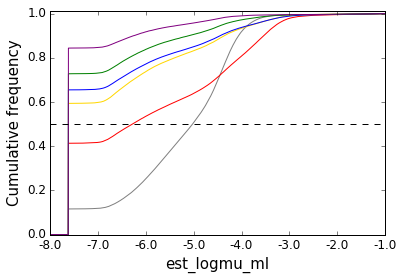

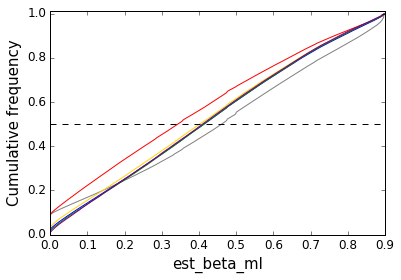

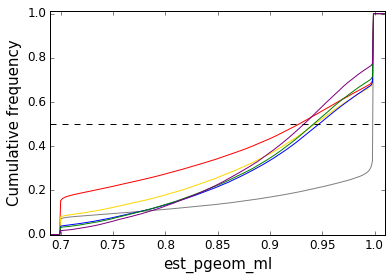

In [9]:
colordict = {
    1: "gray",
    2: "red",
    3: "gold",
    4: "blue",
    5: "green",
    6: "purple"
}

def PlotCDF(data, column, colordict, xlim=(-8, -1), figname=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for period in colordict.keys():
        x = data[data["period"]==period][column].values
        x2 = data[(data["period"]==period) & (data["stderr_ml"]>=0)][column].values
        counts, bins = np.histogram(x, bins=np.arange(xlim[0], xlim[1], 0.001))
        counts = counts*1.0/np.sum(counts)
        counts = np.cumsum(counts)
        ax.plot(bins[:-1], counts, color=colordict[period])
        print period, np.median(x), np.mean(x), np.median(x2), np.mean(x2)
    ax.set_xlim(left=xlim[0], right=xlim[1])
    ax.set_ylim(bottom=0, top=1.01)   
    ax.axhline(y=0.5, color="black", linestyle="dashed")
    ax.set_xlabel(column, size=15)
    ax.set_ylabel("Cumulative frequency", size=15)
    ax.set_xticklabels(ax.get_xticks(), size=12)
    ax.set_yticklabels(ax.get_yticks(), size=12)
    if figname is not None: fig.savefig(figname)
    
# Logmu - CDF by period
PlotCDF(data, "est_logmu_ml", colordict, figname=os.path.join(PLOTDIR, "SupplementalFigure8_perlocus_mu.pdf"))

# Beta - CDF by period
PlotCDF(data, "est_beta_ml", colordict, xlim=(0, 0.9), figname=os.path.join(PLOTDIR, "SupplementalFigure8_perlocus_beta.pdf"))

# Pgeom - CDF by period
PlotCDF(data, "est_pgeom_ml", colordict, xlim=(0.69, 1.01), figname=os.path.join(PLOTDIR, "SupplementalFigure8_perlocus_p.pdf"))